## Amortized mortage additive payment simulation
It calculates amortized loan schedule with principals and interests. It also lists breakdown of the payment schedule when additive payment is paid.

TODO: nothing's wrong with the calculation. for mortage, other fees are associated in each monthly payment (e.g., property taxes, homeowner's insurance, HOA, PMI)

In [9]:
%cd ..

c:\Users\jongm\Desktop\workspace\global


In [10]:
import matplotlib.pyplot as plt
from src.loan_sim import *

In [11]:
LOAN_AMT = 612000
LOAN_TERM = 360 #in month
APR = 0.0325 #in percentage

#### Strategically optimal point of overpayment is where dt_{t+1} == 2 which is at $250 point

In [12]:
df = find_optimal_schedule(P=LOAN_AMT, r=APR, n=LOAN_TERM, test_range=range(0, 10000, 100))

In [13]:
df

,Additive Down,Total Payment Schedule,Total Interest Paid
0,0.0,360.0,346846.56218
1,100.0,339.0,323674.888238
2,200.0,320.0,303523.581352
3,300.0,303.0,285822.191453
4,400.0,288.0,270139.211152
...,...,...,...
95,9500.0,55.0,46813.917666
96,9600.0,54.0,46402.14886
97,9700.0,54.0,45995.746796
98,9800.0,53.0,45597.378039


c:\ProgramData\Anaconda3\envs\main\lib\site-packages\pandas\core\indexes\base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


<AxesSubplot:xlabel='Additive Down'>

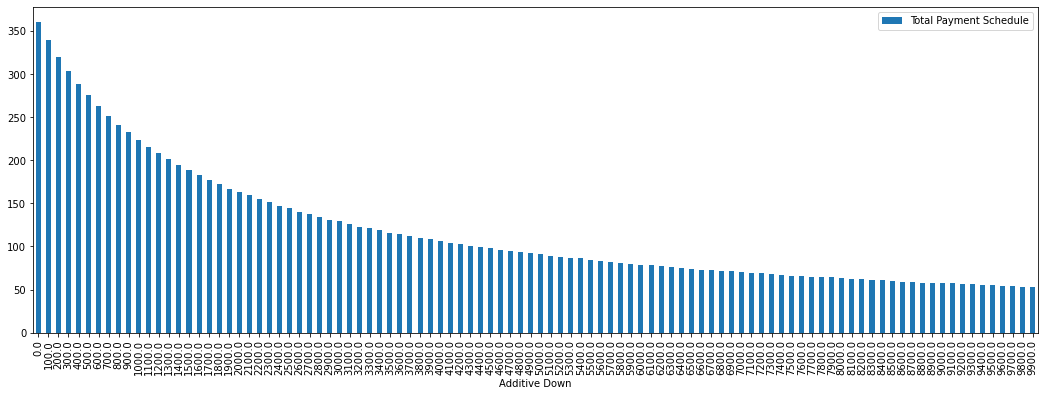

In [14]:
fig, ax = plt.subplots(1,1,figsize=(6*3,6))

df.plot(x='Additive Down', y='Total Payment Schedule', kind='bar', ax=ax)

In [17]:
generate_amortization_table(P=LOAN_AMT, r=APR, n=LOAN_TERM, additive=100)#.Principal.sum()

,Beginning Balance,Total Pmt,Interest,Principal,Ending Balance,Total Interest
1,612000.0,2763.46,1657.5,1105.96,610894.04,1657.5
2,610894.04,2763.46,1654.5,1108.96,609785.08,3312.0
3,609785.08,2763.46,1651.5,1111.96,608673.12,4963.51
4,608673.12,2763.46,1648.49,1114.97,607558.14,6612.0
5,607558.14,2763.46,1645.47,1117.99,606440.15,8257.47
...,...,...,...,...,...,...
335,12582.09,2763.46,34.08,2729.39,9852.71,323612.7
336,9852.71,2763.46,26.68,2736.78,7115.93,323639.39
337,7115.93,2763.46,19.27,2744.19,4371.74,323658.66
338,4371.74,2763.46,11.84,2751.62,1620.12,323670.5


#### Use manual total payment for simulation

In [16]:
generate_amortization_table(P=LOAN_AMT, r=APR, n=LOAN_TERM, M=00)#.Principal.sum()

,Beginning Balance,Total Pmt,Interest,Principal,Ending Balance,Total Interest
1,612000.0,2663.46,1657.5,1005.96,610994.04,1657.5
2,610994.04,2663.46,1654.78,1008.69,609985.35,3312.28
3,609985.35,2663.46,1652.04,1011.42,608973.93,4964.32
4,608973.93,2663.46,1649.3,1014.16,607959.77,6613.62
5,607959.77,2663.46,1646.56,1016.9,606942.87,8260.18
...,...,...,...,...,...,...
356,13209.79,2663.46,35.78,2627.69,10582.1,346774.82
357,10582.1,2663.46,28.66,2634.8,7947.3,346803.48
358,7947.3,2663.46,21.52,2641.94,5305.36,346825.0
359,5305.36,2663.46,14.37,2649.09,2656.27,346839.37


#### END OF THE NOTEBOOK